In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'SBIN.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,04-01-2010,227.500000,230.000000,227.500000,229.119995,95.066895,11031470
1,05-01-2010,230.800003,231.000000,228.009995,229.205002,95.102180,11613740
2,06-01-2010,229.699997,231.500000,228.500000,230.580002,95.672699,14527930
3,07-01-2010,230.600006,231.000000,228.110001,229.289993,95.137444,8576510
4,08-01-2010,229.399994,230.389999,228.009995,228.604996,94.853218,10453820


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2619,24-08-2020,200.0,202.800003,198.600006,201.449997,201.449997,53850253
2620,25-08-2020,204.0,208.449997,202.699997,207.949997,207.949997,105394375
2621,26-08-2020,208.5,210.350006,206.149994,209.850006,209.850006,66749637
2622,27-08-2020,210.5,216.500000,210.500000,215.649994,215.649994,80997993
2623,28-08-2020,217.0,225.899994,216.800003,225.399994,225.399994,95983850


In [5]:
df1 = df.reset_index()['Close']

In [6]:
df1

0       229.119995
1       229.205002
2       230.580002
3       229.289993
4       228.604996
           ...    
2619    201.449997
2620    207.949997
2621    209.850006
2622    215.649994
2623    225.399994
Name: Close, Length: 2624, dtype: float64

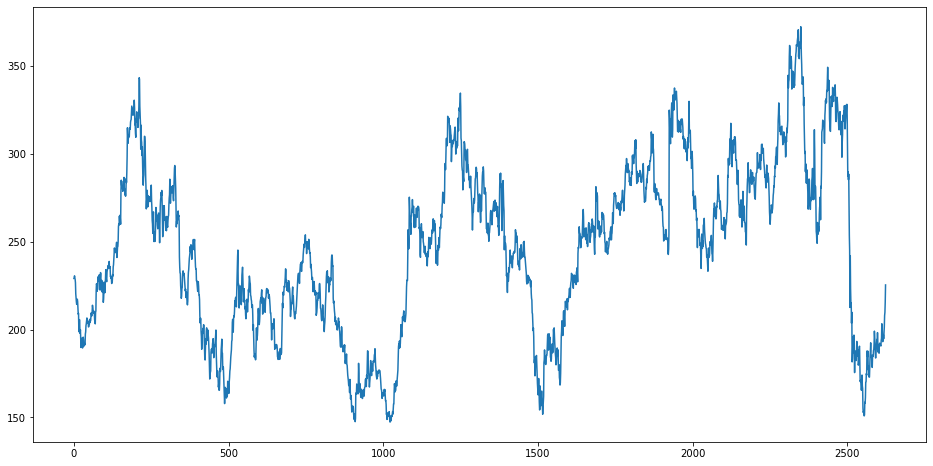

In [7]:
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(df1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = ( 0, 1 ))
df2 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [9]:
print(df2)

[[0.36331317]
 [0.36369092]
 [0.36980094]
 ...
 [0.277684  ]
 [0.30345714]
 [0.34678277]]


In [10]:
training_size = int(len(df2)*0.65)
test_size = len(df2)-training_size
train_data,test_data=df2[0:training_size,:],df2[training_size:len(df2),:1]

In [11]:
training_size,test_size

(1705, 919)

In [12]:
train_data

array([[0.36331317],
       [0.36369092],
       [0.36980094],
       ...,
       [0.47431571],
       [0.48675789],
       [0.49653399]])

In [13]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [14]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [15]:
print(X_train.shape), print(y_train.shape)

(1604, 100)
(1604,)


(None, None)

In [16]:
print(X_test.shape), print(ytest.shape)

(818, 100)
(818,)


(None, None)

In [17]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [19]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2))

model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(50))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [21]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Train on 1604 samples, validate on 818 samples
Epoch 1/100
1604/1604 [==============================] - 10s 6ms/sample - loss: 0.0377 - val_loss: 0.0261
Epoch 2/100
1604/1604 [==============================] - 4s 3ms/sample - loss: 0.0095 - val_loss: 0.0109
Epoch 3/100
1604/1604 [==============================] - 4s 3ms/sample - loss: 0.0068 - val_loss: 0.0096
Epoch 4/100
1604/1604 [==============================] - 5s 3ms/sample - loss: 0.0061 - val_loss: 0.0091
Epoch 5/100
1604/1604 [==============================] - 4s 3ms/sample - loss: 0.0056 - val_loss: 0.0075
Epoch 6/100
1604/1604 [==============================] - 4s 3ms/sample - loss: 0.0058 - val_loss: 0.0090
Epoch 7/100
1604/1604 [==============================] - 5s 3ms/sample - loss: 0.0052 - val_loss: 0.0088
Epoch 8/100
1604/1604 [==============================] - 4s 3ms/sample - loss: 0.0056 - val_loss: 0.0063
Epoch 9/100
1604/1604 [==============================] - 4s 3ms/sample - loss: 0.0046 - val_loss: 0.0097
Epoch 1

Epoch 78/100
1604/1604 [==============================] - 4s 3ms/sample - loss: 0.0017 - val_loss: 0.0019
Epoch 79/100
1604/1604 [==============================] - 4s 3ms/sample - loss: 0.0015 - val_loss: 0.0022
Epoch 80/100
1604/1604 [==============================] - 4s 3ms/sample - loss: 0.0016 - val_loss: 0.0012
Epoch 81/100
1604/1604 [==============================] - 4s 3ms/sample - loss: 0.0014 - val_loss: 0.0015
Epoch 82/100
1604/1604 [==============================] - 5s 3ms/sample - loss: 0.0015 - val_loss: 0.0013
Epoch 83/100
1604/1604 [==============================] - 4s 3ms/sample - loss: 0.0014 - val_loss: 0.0026
Epoch 84/100
1604/1604 [==============================] - 4s 3ms/sample - loss: 0.0014 - val_loss: 0.0011
Epoch 85/100
1604/1604 [==============================] - 5s 3ms/sample - loss: 0.0013 - val_loss: 0.0013
Epoch 86/100
1604/1604 [==============================] - 4s 3ms/sample - loss: 0.0014 - val_loss: 0.0013
Epoch 87/100
1604/1604 [======================

In [22]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [23]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [24]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

232.82805433786893

In [25]:
math.sqrt(mean_squared_error(ytest,test_predict))

277.4926790748273

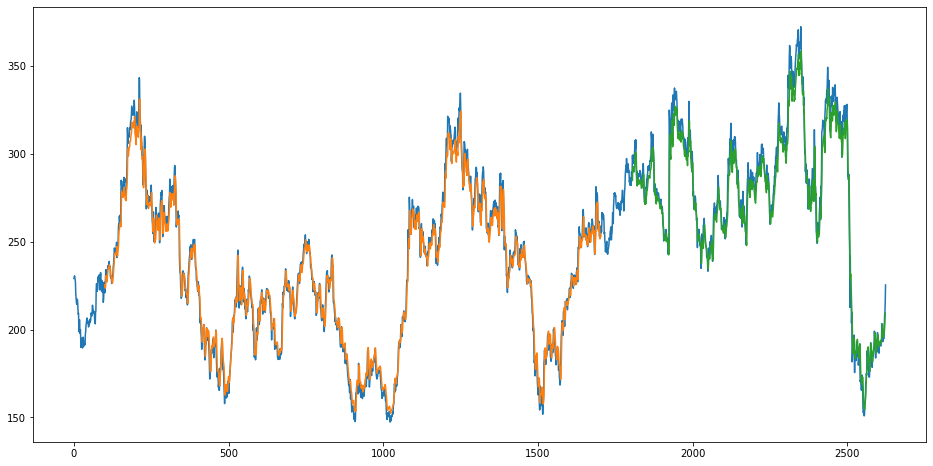

In [26]:
look_back=100
trainPredictPlot = numpy.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(df2)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [27]:
len(test_data)

919

In [28]:
x_input=test_data[819:].reshape(1,-1)
x_input.shape

(1, 100)

In [29]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [30]:
temp_input

[0.1734802444648138,
 0.15837184548792627,
 0.179479204836271,
 0.16059367278775194,
 0.15548349666008032,
 0.18281194578600968,
 0.20391930513435452,
 0.20058656418461585,
 0.1661482410373164,
 0.18370066337497615,
 0.17481335417567312,
 0.14392996803905866,
 0.1490401441667304,
 0.16414860979843704,
 0.18992181980737977,
 0.1916992549853127,
 0.13993070556129994,
 0.10238177087038924,
 0.1054923824140005,
 0.10393707664219487,
 0.08571806612169597,
 0.08038569393307793,
 0.08682897977160886,
 0.1188233462129552,
 0.09149483043220674,
 0.08460715247178308,
 0.035282626408542406,
 0.024173489909413592,
 0.026839642676313002,
 0.02039635683778218,
 0.015508376771056875,
 0.017952333477009974,
 0.04994669991835632,
 0.04816919808560427,
 0.0619445540064516,
 0.10082653175340262,
 0.10171524934236909,
 0.12237821656882109,
 0.11860115015200878,
 0.17970140089721742,
 0.17525774629756585,
 0.1648151313264571,
 0.17925700877532458,
 0.13237643941803712,
 0.14126374861734015,
 0.117045844380

In [31]:
#  prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.32534283]
101
1 day input [0.15837185 0.1794792  0.16059367 0.1554835  0.18281195 0.20391931
 0.20058656 0.16614824 0.18370066 0.17481335 0.14392997 0.14904014
 0.16414861 0.18992182 0.19169925 0.13993071 0.10238177 0.10549238
 0.10393708 0.08571807 0.08038569 0.08682898 0.11882335 0.09149483
 0.08460715 0.03528263 0.02417349 0.02683964 0.02039636 0.01550838
 0.01795233 0.0499467  0.0481692  0.06194455 0.10082653 0.10171525
 0.12237822 0.11860115 0.1797014  0.17525775 0.16481513 0.17925701
 0.13237644 0.14126375 0.11704584 0.11349091 0.1137131  0.14348558
 0.16503733 0.17925701 0.20036437 0.16548172 0.16837007 0.16548172
 0.14170814 0.1381532  0.16637044 0.16925879 0.16592604 0.18081231
 0.18325634 0.19792034 0.22991471 0.21436192 0.20147528 0.17192501
 0.16192678 0.17281372 0.18147884 0.19281017 0.20902948 0.19836474
 0.22613758 0.19814254 0.17681299 0.1870334  0.1948098  0.17414683
 0.19592071 0.19947565 0.1965873  0.19592071 0.19369889 0.19236578
 0.20636333 0.2119179  0.24857805

8 day output [[0.3348476]]
9 day input [0.18370066 0.17481335 0.14392997 0.14904014 0.16414861 0.18992182
 0.19169925 0.13993071 0.10238177 0.10549238 0.10393708 0.08571807
 0.08038569 0.08682898 0.11882335 0.09149483 0.08460715 0.03528263
 0.02417349 0.02683964 0.02039636 0.01550838 0.01795233 0.0499467
 0.0481692  0.06194455 0.10082653 0.10171525 0.12237822 0.11860115
 0.1797014  0.17525775 0.16481513 0.17925701 0.13237644 0.14126375
 0.11704584 0.11349091 0.1137131  0.14348558 0.16503733 0.17925701
 0.20036437 0.16548172 0.16837007 0.16548172 0.14170814 0.1381532
 0.16637044 0.16925879 0.16592604 0.18081231 0.18325634 0.19792034
 0.22991471 0.21436192 0.20147528 0.17192501 0.16192678 0.17281372
 0.18147884 0.19281017 0.20902948 0.19836474 0.22613758 0.19814254
 0.17681299 0.1870334  0.1948098  0.17414683 0.19592071 0.19947565
 0.1965873  0.19592071 0.19369889 0.19236578 0.20636333 0.2119179
 0.24857805 0.24235689 0.21836118 0.20325278 0.21214009 0.22080521
 0.21058479 0.2268041  0.2

16 day output [[0.33230802]]
17 day input [0.10238177 0.10549238 0.10393708 0.08571807 0.08038569 0.08682898
 0.11882335 0.09149483 0.08460715 0.03528263 0.02417349 0.02683964
 0.02039636 0.01550838 0.01795233 0.0499467  0.0481692  0.06194455
 0.10082653 0.10171525 0.12237822 0.11860115 0.1797014  0.17525775
 0.16481513 0.17925701 0.13237644 0.14126375 0.11704584 0.11349091
 0.1137131  0.14348558 0.16503733 0.17925701 0.20036437 0.16548172
 0.16837007 0.16548172 0.14170814 0.1381532  0.16637044 0.16925879
 0.16592604 0.18081231 0.18325634 0.19792034 0.22991471 0.21436192
 0.20147528 0.17192501 0.16192678 0.17281372 0.18147884 0.19281017
 0.20902948 0.19836474 0.22613758 0.19814254 0.17681299 0.1870334
 0.1948098  0.17414683 0.19592071 0.19947565 0.1965873  0.19592071
 0.19369889 0.19236578 0.20636333 0.2119179  0.24857805 0.24235689
 0.21836118 0.20325278 0.21214009 0.22080521 0.21058479 0.2268041
 0.24035726 0.26924101 0.277684   0.30345714 0.34678277 0.32534283
 0.3324407  0.33187872

24 day output [[0.32900068]]
25 day input [0.08460715 0.03528263 0.02417349 0.02683964 0.02039636 0.01550838
 0.01795233 0.0499467  0.0481692  0.06194455 0.10082653 0.10171525
 0.12237822 0.11860115 0.1797014  0.17525775 0.16481513 0.17925701
 0.13237644 0.14126375 0.11704584 0.11349091 0.1137131  0.14348558
 0.16503733 0.17925701 0.20036437 0.16548172 0.16837007 0.16548172
 0.14170814 0.1381532  0.16637044 0.16925879 0.16592604 0.18081231
 0.18325634 0.19792034 0.22991471 0.21436192 0.20147528 0.17192501
 0.16192678 0.17281372 0.18147884 0.19281017 0.20902948 0.19836474
 0.22613758 0.19814254 0.17681299 0.1870334  0.1948098  0.17414683
 0.19592071 0.19947565 0.1965873  0.19592071 0.19369889 0.19236578
 0.20636333 0.2119179  0.24857805 0.24235689 0.21836118 0.20325278
 0.21214009 0.22080521 0.21058479 0.2268041  0.24035726 0.26924101
 0.277684   0.30345714 0.34678277 0.32534283 0.3324407  0.33187872
 0.33090186 0.33078006 0.33146742 0.33262736 0.33386117 0.3348476
 0.33541393 0.3355346

In [32]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [33]:
len(df1)

2624

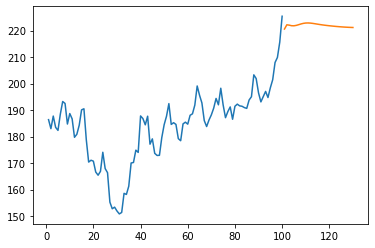

In [34]:
import matplotlib.pyplot as plt
plt.plot(day_new,scaler.inverse_transform(df2[2524:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

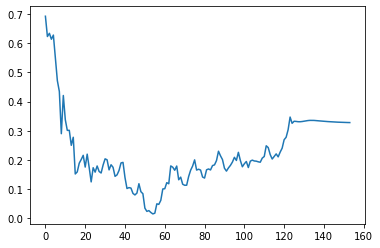

In [35]:
df3=df2.tolist()
df3.extend(lst_output)
plt.plot(df3[2500:])

In [36]:
df3=scaler.inverse_transform(df3).tolist()

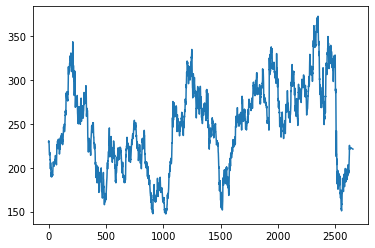

In [37]:
plt.plot(df3)